In [2]:
import pandas as pd
import numpy as npf
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')

print(df.info())


df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Count the missing values in each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64


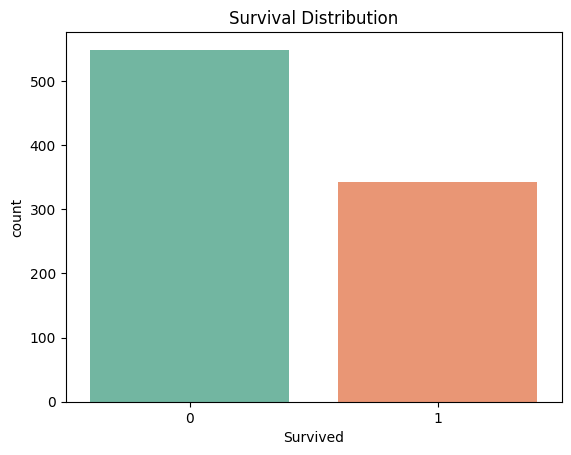

Overall Survival Rate: 38.38%


In [18]:
# Statistics on survival rate
sns.countplot(x='Survived', data=df, palette='Set2',hue="Survived",legend=False)
plt.title('Survival Distribution')
plt.show()

# Calculate survival rate
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")


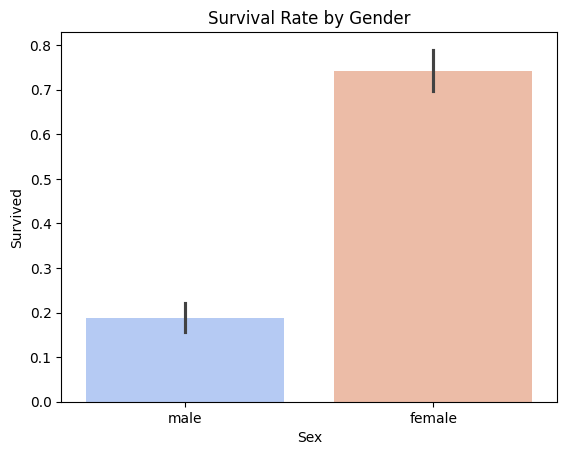

In [19]:
#The relationship between variables: gender vs. survival rate
sns.barplot(x="Sex", y="Survived", hue="Sex", data=df, palette="coolwarm", legend=False)
plt.title("Survival Rate by Gender")
plt.show()

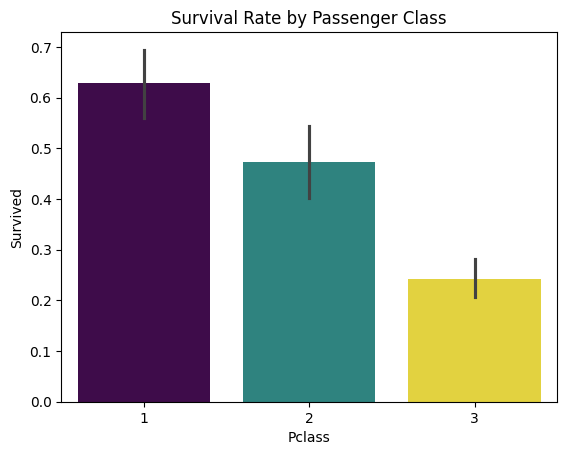

In [25]:
#The relationship between variables: Pclass vs. survival rate
sns.barplot(x="Pclass", y="Survived", data=df, palette="viridis",hue="Pclass",legend=False)
plt.title("Survival Rate by Passenger Class")
plt.show()

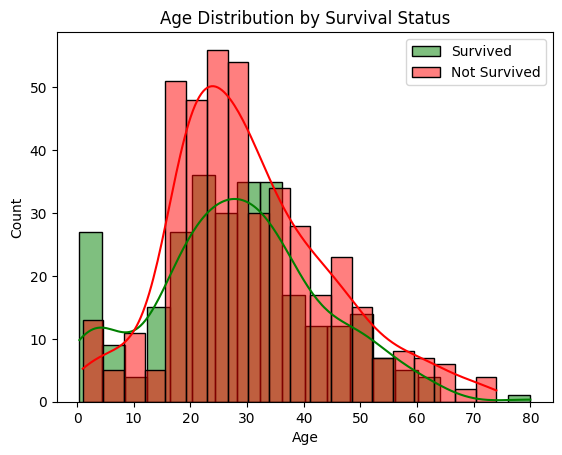

In [26]:
#The relationship between variables: Age vs. survival rate
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.title("Age Distribution by Survival Status")
plt.legend()
plt.show()


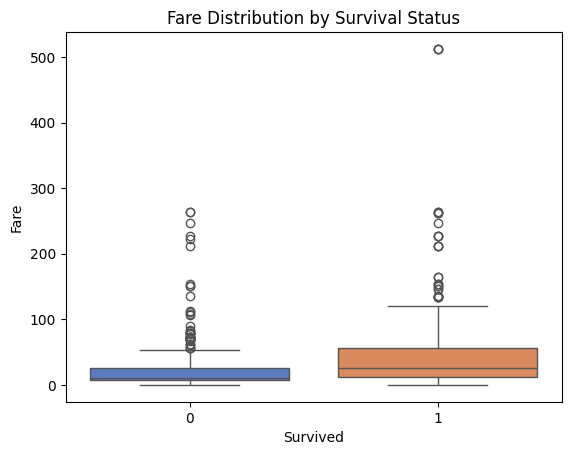

In [24]:
#The relationship between variables: Fare vs. survival rate
sns.boxplot(x="Survived", y="Fare", data=df, palette="muted",hue="Survived",legend=False)
plt.title("Fare Distribution by Survival Status")
plt.show()

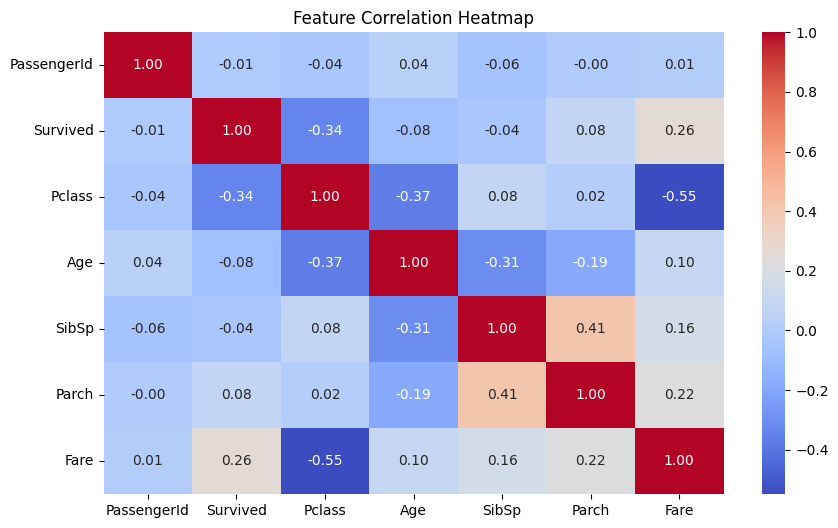

In [28]:
# 计算数值型变量的相关系数
corr_matrix = df.select_dtypes(include=['number']).corr()


# 画出热力图
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
